# Heart Disease Data Set


Data Set Information:


This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).



Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)



Dataset available

https://github.com/dsrscientist/dataset1/commit/069bd564d188a6345a426da5d42bce289362d7ec

https://github.com/dsrscientist/dataset1

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Topics

* Types of Data 
 
 
* Reading data using pandas


* Visualizing data using seaborn & matloblib


* Model building 


     Preparing X and y using pandas

     Splitting X and y into training and testing sets
  


* Alogrrithms

  LR - Linear Regression

  KNN - KNeighbors Classifier

  SVM - Support Vector Machine

  SVR - Support Vector Regression

  NB - Naive Bayes

  DTC - Decision Tree Classifier


* Making predictions


* Model evaluation metrics

In [95]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import pandas_profiling as pp

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# data load
df=pd.read_csv('heartdisease_data.csv',sep=',',na_values=".")

In [3]:
# rename column num with column name

df2=df.rename(columns={"63": "age",
                       "1":"sex",
                       "4":"cp",
                       "140":"trestbps",
                       "260":"chol",
                       "0":"fbs",
                       "1.1":"restecg",
                       "112":"thalach",
                       "1.2":"exang",
                       "3":"oldpeak",
                       "2":"slope",
                       "?":"ca",
                       "?.1":"thal",
                       "2.1": "target"}) 

In [4]:
# new columns

df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# replcae all ? to 0 value
df_new=df2.replace(to_replace="?", 
                 value ="0")
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,0,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
2,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0,0,0
5,65,1,4,150,236,1,1,105,1,0,0,0,0,3
6,60,1,3,180,0,0,1,140,1,1.5,2,0,0,0
7,60,1,3,120,0,0,0,141,1,2,1,0,0,3
8,60,1,2,160,267,1,1,157,0,0.5,2,0,0,1
9,56,1,2,126,166,0,1,140,0,0,0,0,0,0


In [6]:
# first five row

df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,0,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
2,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0,0,0


In [7]:
# data shape

df_new.shape

(199, 14)

In [8]:
# data types

df_new.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

In [9]:
# null value check

df_new.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# null value sum

df_new.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

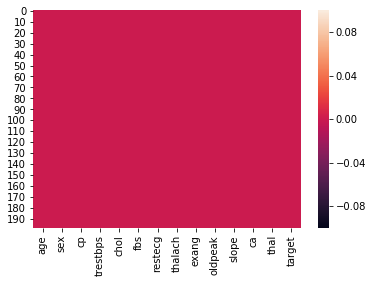

In [11]:
# null value heatmap

sns.heatmap(df_new.isnull())

In [12]:
#  columns Data set information

print("Unique Values in each column:")
print('-'*100)
cols=list(df_new.columns)
for c in cols:
    print(c.upper(), ":", df_new[c].unique(), "\n")
    print('-'*100)

Unique Values in each column:
----------------------------------------------------------------------------------------------------
AGE : [44 60 55 66 65 56 59 62 63 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37] 

----------------------------------------------------------------------------------------------------
SEX : [1 0] 

----------------------------------------------------------------------------------------------------
CP : [4 3 2 1] 

----------------------------------------------------------------------------------------------------
TRESTBPS : ['130' '132' '142' '110' '120' '150' '180' '160' '126' '140' '0' '128'
 '170' '152' '116' '124' '122' '144' '154' '125' '104' '136' '134' '138'
 '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156' '118'
 '100' '190' '114' '127'] 

----------------------------------------------------------------------------------------------------
CHOL : ['209' '218' '228' '213' '0' '236' '267' '16

In [13]:
# dataset overview

pp.ProfileReport(df_new)

Number of variables,14
Number of observations,199
Total Missing (%),0.0%
Total size in memory,21.8 KiB
Average record size in memory,112.4 B
Numeric,4
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [14]:
# statistical data drive

df_new.describe()

,age,sex,cp,restecg,target
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,0.733668,1.517588
std,7.827080,0.171433,0.796928,0.684918,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


<function matplotlib.pyplot.show(*args, **kw)>

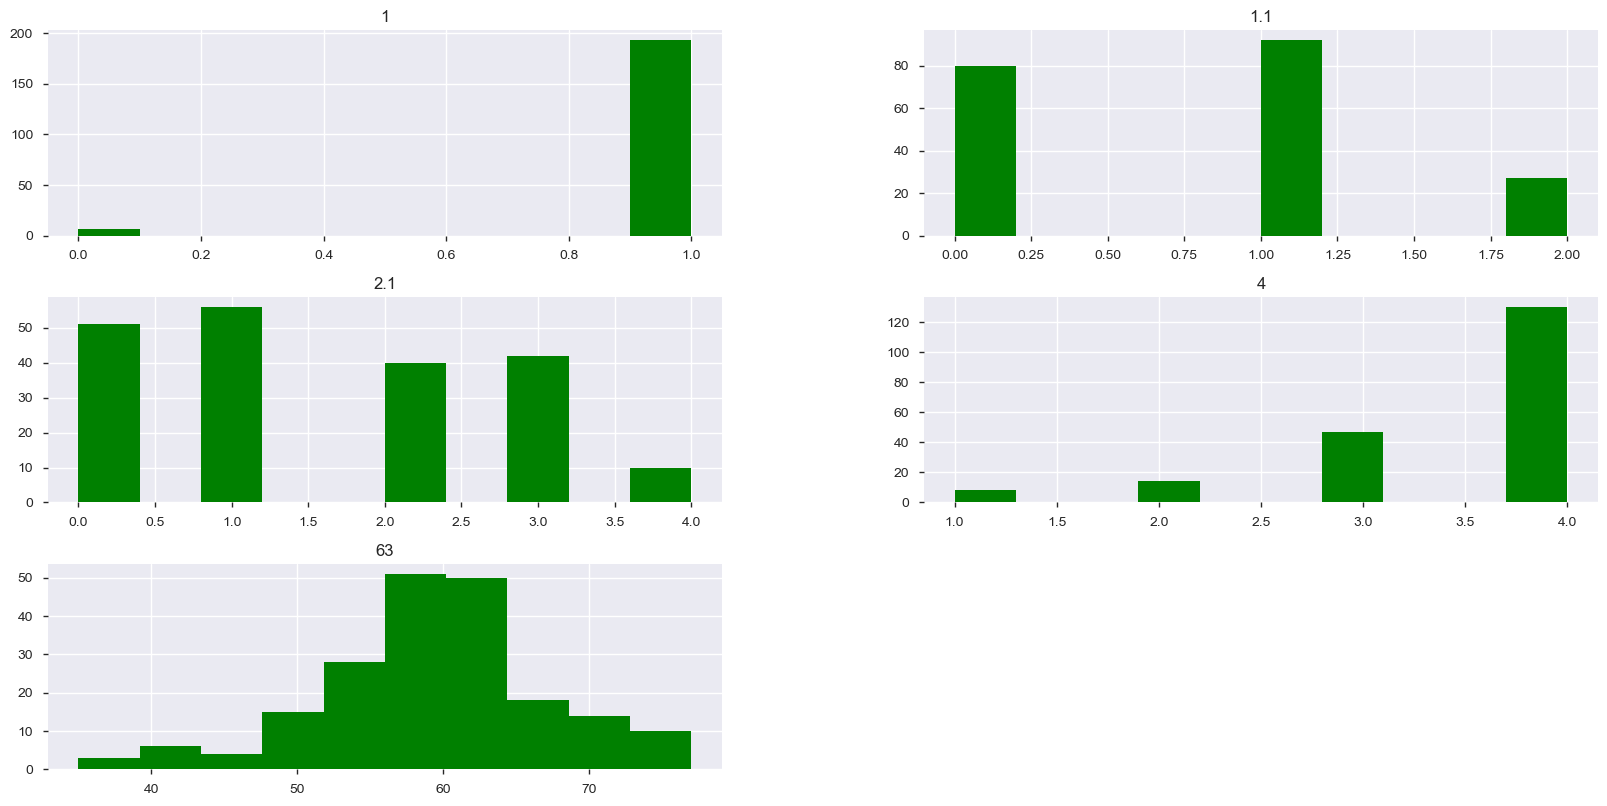

In [15]:
# Univariate Analysis

df.hist(figsize=(20,20),layout=(6,2),color='green')
plt.show

In [16]:
# Bivariate analysis

sns.set(style="white", palette="PuBuGn_d", color_codes=True)

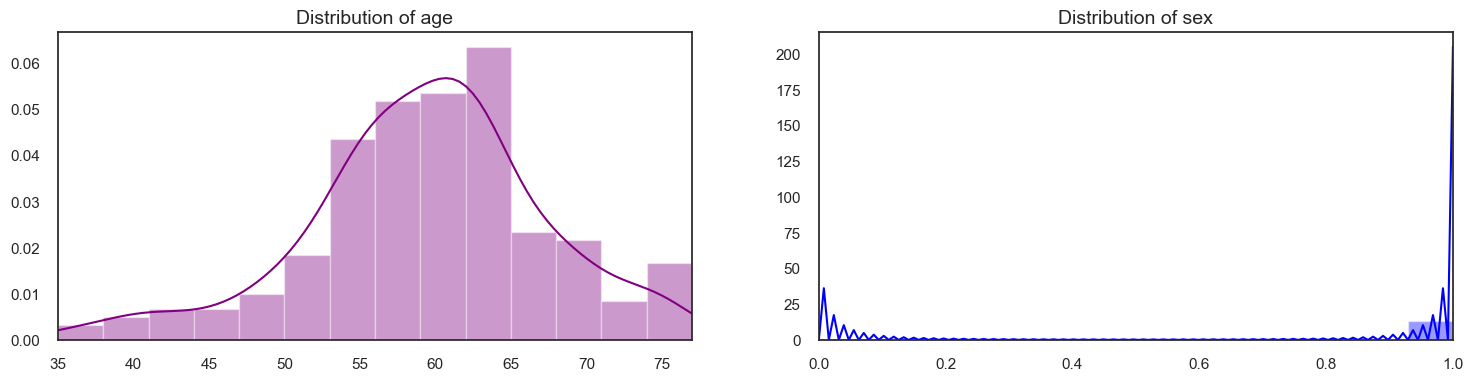

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
age=df_new['age'].values
sex=df_new['sex'].values
sns.distplot(age, ax=ax[0], color='purple')
ax[0].set_title('Distribution of age', fontsize=14)
ax[0].set_xlim([min(age), max(age)])
sns.distplot(sex, ax=ax[1], color='b')
ax[1].set_title('Distribution of sex', fontsize=14)
ax[1].set_xlim([min(sex), max(sex)])
plt.show()

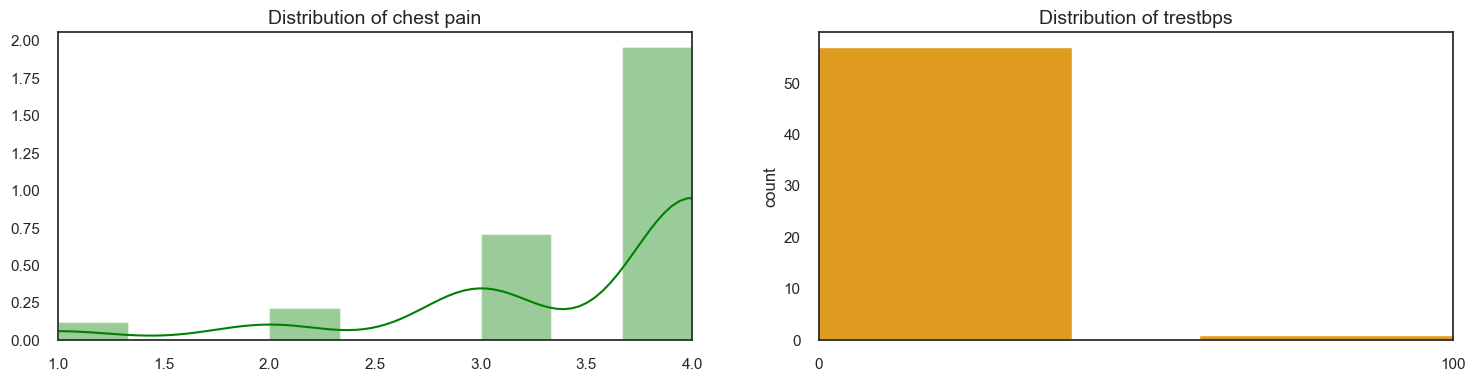

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
cp =df_new['cp'].values
trestbps=df_new['trestbps'].values
sns.distplot(cp, ax=ax[0], color='green')
ax[0].set_title('Distribution of chest pain', fontsize=14)
ax[0].set_xlim([min(cp), max(cp)])
sns.countplot(trestbps, ax=ax[1], color='orange')
ax[1].set_title('Distribution of trestbps', fontsize=14)
ax[1].set_xlim([min(trestbps), max(trestbps)])
plt.show()

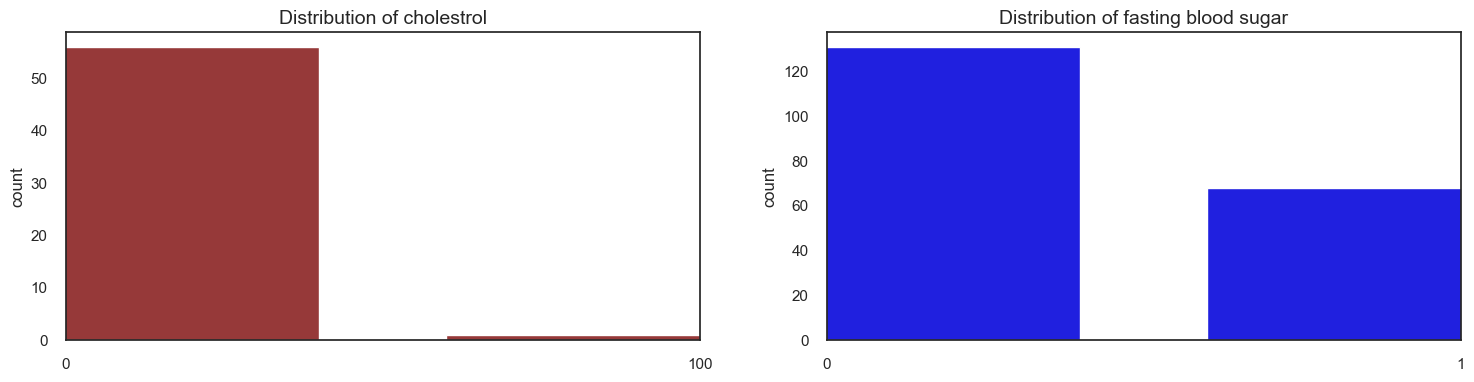

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
chol = df_new['chol'].values
fbs =df_new['fbs'].values
sns.countplot(chol, ax=ax[0], color='brown')
ax[0].set_title('Distribution of cholestrol', fontsize=14)
ax[0].set_xlim([min(chol), max(chol)])
sns.countplot(fbs, ax=ax[1], color='blue')
ax[1].set_title('Distribution of fasting blood sugar', fontsize=14)
ax[1].set_xlim([min(fbs), max(fbs)])
plt.show()

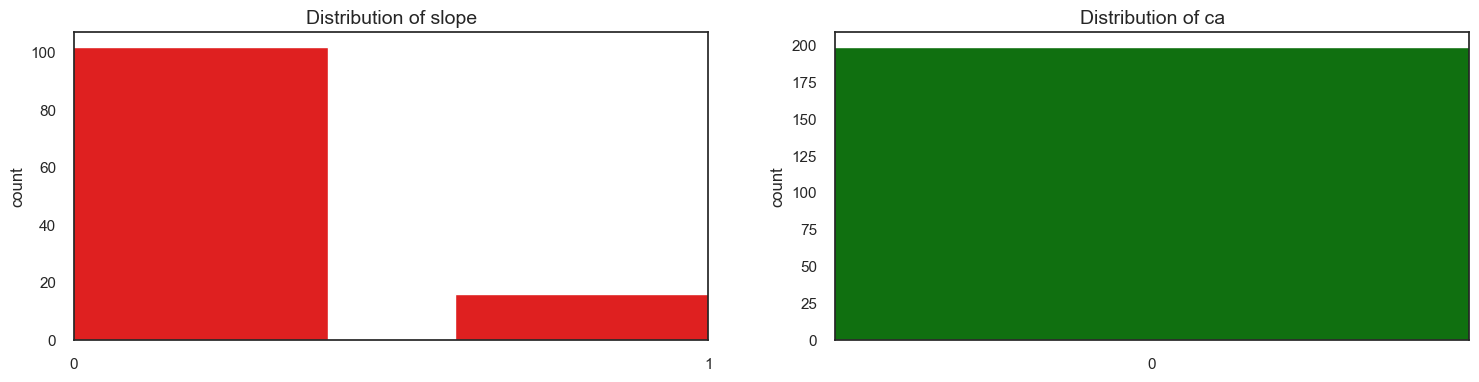

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
slope = df_new['slope'].values
ca = df_new['ca'].values
sns.countplot(slope,ax=ax[0], color='red')
ax[0].set_title('Distribution of slope', fontsize=14)
ax[0].set_xlim([min(slope), max(slope)])
sns.countplot(ca, ax=ax[1], color='green')
ax[1].set_title('Distribution of ca', fontsize=14)
ax[1].set_xlim([min(ca), max(ca)])
plt.show()

In [21]:
# group type

type_dis=df_new.groupby('cp')

# Display first few rows
type_dis.first()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,,
1,67,1,142,270,1,0,125,0,2.5,1,0,0,3
2,60,1,160,267,1,1,157,0,0.5,2,0,0,1
3,66,1,110,213,1,2,99,1,1.3,2,0,0,0
4,44,1,130,209,0,1,127,0,0,0,0,0,0


In [22]:
groupby=df_new.groupby('sex')

groupby.first()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,63,2,0,0,0,0,0,0,0,0,0,0,0
1,44,4,130,209,0,1,127,0,0,0,0,0,0


In [23]:
groupby=df_new.groupby(['sex','cp'])

groupby.first()

age trestbps chol fbs  restecg thalach exang oldpeak slope ca thal  \
sex cp                                                                       
0   2    63        0    0   0        0       0     0       0     0  0    0   
    4    64      142  276   0        0     140     1       1     2  0    7   
1   1    67      142  270   1        0     125     0     2.5     1  0    0   
    2    60      160  267   1        1     157     0     0.5     2  0    0   
    3    66      110  213   1        2      99     1     1.3     2  0    0   
    4    44      130  209   0        1     127     0       0     0  0    0   

        target  
sex cp          
0   2        0  
    4        1  
1   1        3  
    2        1  
    3        0  
    4        0

In [24]:
# crosstab pivot table

pd.crosstab(df_new["cp"],df_new["age"],margins=True)

age,35,37,38,40,41,42,43,44,45,46,...,68,69,70,71,72,74,75,76,77,All
cp,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
3,1,1,0,1,0,1,0,0,1,0,...,2,2,0,1,1,2,0,1,0,47
4,0,0,1,1,2,0,1,1,0,2,...,1,6,1,1,2,2,3,0,1,130
All,1,1,1,2,2,1,1,1,1,2,...,4,8,1,2,3,5,3,1,1,199


In [25]:
# crosstab pivot table

pd.crosstab(df_new["cp"],df_new["sex"],margins=True)

sex,0,1,All
cp,,,
1,0,8,8
2,2,12,14
3,0,47,47
4,4,126,130
All,6,193,199


In [26]:
# crosstab pivot table

pd.crosstab(df_new["cp"],df_new["chol"],margins=True)

chol,0,100,139,142,153,160,161,165,166,170,...,316,333,337,339,349,369,384,385,458,All
cp,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,3,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,14
3,19,0,0,1,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,47
4,33,1,0,0,1,1,0,0,0,2,...,0,1,0,0,1,1,1,1,1,130
All,56,1,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,199


In [27]:
# crosstab pivot table

pd.crosstab(df_new["cp"],df_new["trestbps"],margins=True)

trestbps,0,100,102,104,106,110,112,114,116,118,...,156,158,160,170,172,178,180,190,96,All
cp,,,,,,,,,,,,,,,,,,,,,
1,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,6,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,14
3,20,0,1,1,1,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,47
4,27,1,0,1,0,7,1,1,2,0,...,1,3,7,3,1,1,0,1,1,130
All,57,1,1,2,1,9,2,1,2,1,...,1,3,8,4,1,1,2,1,1,199


# Model


# Algorithm use

* LR - Linear Regression

* KNN - KNeighbors Classifier

* SVM - Support Vector Machine 

* SVR - Support Vector Regression

* NB - Naive Bayes

* DTC - Decision Tree Classifier

In [118]:
# import liabraries:

# model test & train split
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# k-Fold Cross-Validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

# stats
import statsmodels.api as sm

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# NN models
import tensorflow as tf
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter

ModuleNotFoundError: No module named 'hyperopt'

In [73]:
# import liabraries:

# ML sklearn model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# stats
import statsmodels.api as sm

# Model Liabraries

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [29]:
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,0,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
2,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0,0,0


In [44]:
# Data prepearing for target

x=df_new.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]] # variables
y=df_new.iloc[:,[13]] # traget

In [77]:
target_name = 'target'
data_target = df_new[target_name]
data = df_new.drop([target_name], axis=1)

In [78]:
# spliting data into train and test model

train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [79]:
x_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
153,1,4,128,223,0,1,119,1,2,3,0,0
66,1,4,120,0,0,2,106,1,1.5,3,0,7
26,1,4,130,186,1,1,140,1,0.5,2,0,0
131,1,4,112,261,0,0,140,0,1.5,1,0,0
146,1,4,0,204,1,1,0,0,0,0,0,0


In [80]:
y_train.head()

,target
153,2
66,1
26,1
131,1
146,1


In [81]:
x_test.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
18,1,4,152,0,0,1,118,1,0,0,0,7
169,1,4,124,243,0,0,122,1,2,2,0,7
106,1,4,124,0,0,0,117,1,1,2,0,0
92,1,4,110,198,0,0,110,0,0,0,0,0
176,1,4,130,258,1,2,130,0,0,0,0,6


In [82]:
y_test.head()

,target
18,0
169,1
106,1
92,1
176,2


In [83]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 153 to 172
Data columns (total 12 columns):
sex         159 non-null int64
cp          159 non-null int64
trestbps    159 non-null object
chol        159 non-null object
fbs         159 non-null object
restecg     159 non-null int64
thalach     159 non-null object
exang       159 non-null object
oldpeak     159 non-null object
slope       159 non-null object
ca          159 non-null object
thal        159 non-null object
dtypes: int64(3), object(9)
memory usage: 16.1+ KB


In [84]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 18 to 193
Data columns (total 12 columns):
sex         40 non-null int64
cp          40 non-null int64
trestbps    40 non-null object
chol        40 non-null object
fbs         40 non-null object
restecg     40 non-null int64
thalach     40 non-null object
exang       40 non-null object
oldpeak     40 non-null object
slope       40 non-null object
ca          40 non-null object
thal        40 non-null object
dtypes: int64(3), object(9)
memory usage: 4.1+ KB


# Logistic Regression

In [85]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

42.77

In [86]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

42.5

In [87]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,thalach,0.293038
7,exang,0.005378
4,fbs,0.000717
3,chol,0.000448
11,thal,0.000000
0,sex,-0.018624
10,ca,-0.032122
1,cp,-0.103450
2,trestbps,-0.280959
9,slope,-0.495696


# Support Vector Machines

In [88]:
# Support Vector Machines

svc = SVC()
svc.fit(train, target)
acc_svc = round(svc.score(train, target) * 100, 2)
acc_svc

99.37

In [89]:
acc_test_svc = round(svc.score(test, target_test) * 100, 2)
acc_test_svc

30.0

# Linear SVC

In [90]:
# Linear SVC

linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_linear_svc

46.54

In [91]:
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
acc_test_linear_svc

35.0

# k-Nearest Neighbors

In [96]:
# k-Nearest Neighbors algorithm

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

64.15 {'n_neighbors': 2}


In [97]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

30.0

# Gaussian Naive Bayes

In [98]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

20.75

In [99]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

15.0

# Perceptron

In [100]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

22.64

In [101]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

15.0

# Stochastic Gradient Descent

In [102]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, target)
acc_sgd = round(sgd.score(train, target) * 100, 2)
acc_sgd

27.04

In [103]:
acc_test_sgd = round(perceptron.score(test, target_test) * 100, 2)
acc_test_sgd

15.0

# Decision Tree Classifier

In [104]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

100.0

In [105]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

32.5

In [106]:
# Random Forest

In [107]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 100}


In [108]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

30.0

In [116]:
def hyperopt_xgb_score(params):
    clf = XGBClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_xgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'eta': hp.quniform('eta', 0.025, 0.5, 0.005),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'subsample': hp.quniform('subsample', 0.5, 1, 0.005),
            'gamma': hp.quniform('gamma', 0.5, 1, 0.005),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'tree_method': 'exact',
            'silent': 1,
            'missing': None
        }
 
best = fmin(fn=hyperopt_xgb_score, space=space_xgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

NameError: name 'hp' is not defined

In [115]:
# building regression function

model=sm.OLS(test,target)

# model fit into regression function

regression=model.fit()

# print regression summary

print(regression.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

* R-squared (R²): Explains how well the model fits the data with a range of 0 -1, the higher the R² is, the better the model fits the data. (Concerns: If the R² is really close to 1, we may think there is an overfitting issue.)


* F-Statistic: The larger the F-Statistic gets, the better the model performs. Normally we take the number of data points into consideration when we decide how large the F-sats is the proof of the model is good at prediction.


* coef: how many the estimated average of the output variable will change the corresponding variable X changes by a unit.


* t: the t-score in this case, explains how many standard deviations away from the mean with regard to the input variable.


* P > |t|: the p-value, explains how strong the X relats to Y.

# conclusion

Above in statistical model we saw that our model is predict accuracy. In a positively skewed distribution, that means the mean is usually greater than the median because the few high scores tend to shift the mean to the right.

Predicted Model Results Below:

LinearRegression : -1537.414073 (50.135603)

knn : -543.109312 (31.531207)

SVR : -1198.374985 (44.690890)

SVM : -1377.117805 (176.362215)

NB : -6096.325811 (211.649202)

decision_tree : -813.238122 (75.021807) 

* we can analysis that knn result is good as compare to all other results as per train and test model after cross check of alogrithm with minmaxscaler. 

* we also analysis that Average price of Avocado as per year trend is increasing as compare to 2018, in 2018 Average price is in dicreasing trend as per pivot table comparising. 

* Avocado tye of conventional & organic Total volume of consuption is different, conventional volume consuption is larger than organic

* Avocado average price of organic is larger than consuption average price


we have to increase number of volume in organic as compare to consuption and average price of avocado should be increase as compare to previous years to maximize revenue. we select model knn of Regreesion as compare with Decision Tree cross validation  and other alogrithms to generate good Revenue volume of avocado as per location and season efect with average price.